In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
DATA = "data.csv"
data = pd.read_csv(DATA)
data = data.dropna()
data.head()

,product_id,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,availability_status,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,In Stock,7,Spring,Yes,0.658145,Individual,Female
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",In Stock,54,Winter,No,4.734585,Bundle,Female
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",In Stock,31,Winter,No,2.024140,Bundle,Female
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,In Stock,49,Spring,No,3.869239,Individual,Other
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,In Stock,74,Winter,Yes,0.812489,Individual,Male


In [10]:
data['discount'] = (data['original_price'] - data['selling_price']) / data['original_price'] * 100
data['discount'] = data['discount'].astype(int)

In [11]:
D = data.groupby('brand').aggregate({'discount': 'mean', 'product_rating': 'mean'})

In [12]:
rating_threshold = 4
discount_threshold = 20
# Filter based on rating_threshold and discount_threshold
high_discount_high_rating = D[(D['discount'] > discount_threshold) & (D['product_rating'] > rating_threshold)]
low_discount_low_rating = D[(D['discount'] <= discount_threshold) & (D['product_rating'] <= rating_threshold)]
high_discount_low_rating = D[(D['discount'] > discount_threshold) & (D['product_rating'] <= rating_threshold)]
low_discount_high_rating = D[(D['discount'] <= discount_threshold) & (D['product_rating'] > rating_threshold)]


In [13]:
high_discount_high_rating

,discount,product_rating
brand,,
Aashirvaad,24.600000,4.150000
Ajax,50.000000,4.900000
Akar,26.000000,4.100000
Allegro,48.000000,4.150000
Ants-Duraprot,26.000000,4.150000
...,...,...
Ziva,36.333333,4.033333
bb Popular,29.625000,4.009375
bb Royal,25.802158,4.047122


In [14]:
print(len(high_discount_high_rating), len(high_discount_low_rating), len(low_discount_high_rating), len(low_discount_low_rating))

108 180 925 720


In [26]:
def get_discount_vs_rating(brand=True, level=0, name=None, number=False):
    rating_threshold = 4
    discount_threshold = 20
    if brand:
        if level == 0:
            D = data.groupby('brand').aggregate({'discount': 'mean', 'product_rating': 'mean'})
        elif level == 1:
            D = data.where(data['category'] == name).groupby('brand').aggregate({'discount': 'mean', 'product_rating': 'mean'})
        elif level == 2:
            D = data.where(data['product_subcategory'] == name).groupby('brand').aggregate({'discount': 'mean', 'product_rating': 'mean'})
        elif level == 3:
            D = data.where(data['product_type'] == name).groupby('brand').aggregate({'discount': 'mean', 'product_rating': 'mean'})            

    
    # Filter based on rating_threshold and discount_threshold
    high_discount_high_rating = D[(D['discount'] > discount_threshold) & (D['product_rating'] > rating_threshold)]
    low_discount_low_rating = D[(D['discount'] <= discount_threshold) & (D['product_rating'] <= rating_threshold)]
    high_discount_low_rating = D[(D['discount'] > discount_threshold) & (D['product_rating'] <= rating_threshold)]
    low_discount_high_rating = D[(D['discount'] <= discount_threshold) & (D['product_rating'] > rating_threshold)]
    
    if number:
        return (len(high_discount_high_rating), len(low_discount_high_rating), len(low_discount_low_rating), len(high_discount_low_rating))
    else:
        return (D.to_dict())

            


In [30]:
D = data.groupby('brand').aggregate({'discount': 'mean', 'product_rating': 'mean'})


In [35]:
D.describe()

,discount,product_rating
count,1933.000000,1933.000000
mean,8.560230,3.924092
std,12.622801,0.630104
min,0.000000,1.000000
25%,0.000000,3.700000
50%,2.000000,4.050000
75%,12.583333,4.260000
max,73.333333,5.000000


In [27]:
get_discount_vs_rating()

{'discount': {'&Me': 0.0,
  '&Stirred': 0.0,
  '109°F': 50.0,
  '137 Degree': 0.0,
  '18 Herbs': 0.0,
  '1mg': 0.0,
  '1st Bites': 0.0,
  '24 Mantra': 3.6136363636363638,
  '3 Roses': 0.4,
  '3BO': 0.0,
  '4700BC': 10.0,
  '50 Ap ': 0.0,
  '50ap': 0.0,
  '6 Rasa': 0.0,
  '7 Up': 18.0,
  '999': 2.5,
  'A&M': 0.0,
  'A-1 Chips': 0.0,
  'A.D.J Classic Choice': 4.5,
  'ACETONE': 0.0,
  'ACT II': 4.625,
  'ADIRA': 9.0,
  'AGARO': 11.142857142857142,
  'ALPENLIEBE': 2.5454545454545454,
  'AMADO': 0.0,
  'AMAJAIN': 0.0,
  'Aachi': 9.125,
  'Aagam': 33.81818181818182,
  'Aaha Oho': 0.0,
  'Aaniya': 0.0,
  'Aarika': 0.0,
  'Aarna': 0.0,
  'Aashirvaad': 24.6,
  'Aashirvaad Svasti': 4.666666666666667,
  'Abbies': 0.0,
  'Absorb-It': 0.0,
  'Abzorb-It': 0.0,
  'Acnes': 0.0,
  'Adidas': 3.3333333333333335,
  'Adithya': 0.0,
  'Aer': 8.75,
  'Aeres': 0.0,
  'Aerostar': 12.0,
  'Again': 0.0,
  'Agnesi': 0.0,
  'Ah!rogya Bar': 0.0,
  'Air wick': 8.75,
  'Airific': 0.0,
  'Ajax': 50.0,
  'Ajinomoto': 0

In [45]:
import json

my_list = data['product_subcategory'].unique().tolist()

# Convert the list to JSON format
json_data = json.dumps(my_list)

# Write the JSON data to a file
with open('subcategories.json', 'w') as file:
    file.write(json_data)


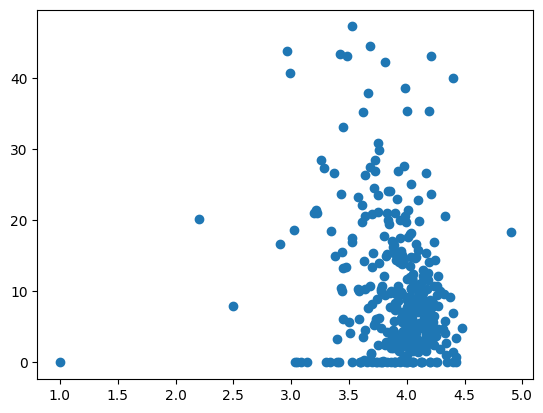

In [51]:
D = data.groupby('product_type').aggregate({'discount': 'mean', 'product_rating': 'mean'})
plt.scatter(D['product_rating'], D['discount'])